In [66]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from keras.utils import to_categorical
import tensorflow as tf

In [67]:
df=pd.read_csv("winequality-red.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [68]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [69]:
# df.isnull().any()
# df = df.fillna(method='ffill')

In [70]:
dataset=df.values

In [71]:
X=dataset[:,0:11]
Y=dataset[:,11]


In [72]:
min_max_scaler=preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [1]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

NameError: name 'train_test_split' is not defined

In [74]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1279, 11) (160, 11) (160, 11) (1279,) (160,) (160,)


## We specify that in our Keras sequential model like this:

In [90]:
#Sigmoid Function (A function which ‘squeezes’ all the initial output to be between 0 and 1)
#ReLU Function (If the initial output is negative, then output 0. If not, do nothing to the initial output)
model = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='relu'),
    Dense(9, activation = 'softmax'),
])

In [91]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1279 samples, validate on 160 samples
Epoch 1/100
1279/1279 [==============================] - 1s 851us/step - loss: 1.9596 - acc: 0.2955 - val_loss: 1.6549 - val_acc: 0.3625
Epoch 2/100
1279/1279 [==============================] - 0s 58us/step - loss: 1.4210 - acc: 0.4183 - val_loss: 1.2423 - val_acc: 0.3875
Epoch 3/100
1279/1279 [==============================] - 0s 53us/step - loss: 1.2356 - acc: 0.4699 - val_loss: 1.1780 - val_acc: 0.4813
Epoch 4/100
1279/1279 [==============================] - 0s 48us/step - loss: 1.1861 - acc: 0.5035 - val_loss: 1.1456 - val_acc: 0.5375
Epoch 5/100
1279/1279 [==============================] - 0s 50us/step - loss: 1.1484 - acc: 0.5113 - val_loss: 1.1172 - val_acc: 0.5563
Epoch 6/100
1279/1279 [==============================] - 0s 55us/step - loss: 1.1114 - acc: 0.5356 - val_loss: 1.0920 - val_acc: 0.5375
Epoch 7/100
1279/1279 [==============================] - 0s 50us/step - loss: 1.0820 - acc: 0.5536 - val_loss: 1.0681 - val_acc: 0.5563


Epoch 60/100
1279/1279 [==============================] - 0s 47us/step - loss: 0.9303 - acc: 0.6177 - val_loss: 0.9683 - val_acc: 0.6000
Epoch 61/100
1279/1279 [==============================] - 0s 43us/step - loss: 0.9313 - acc: 0.6106 - val_loss: 0.9387 - val_acc: 0.5687
Epoch 62/100
1279/1279 [==============================] - 0s 41us/step - loss: 0.9261 - acc: 0.6169 - val_loss: 0.9411 - val_acc: 0.6062
Epoch 63/100
1279/1279 [==============================] - 0s 41us/step - loss: 0.9270 - acc: 0.6114 - val_loss: 0.9340 - val_acc: 0.6375
Epoch 64/100
1279/1279 [==============================] - 0s 41us/step - loss: 0.9276 - acc: 0.6169 - val_loss: 0.9401 - val_acc: 0.5938
Epoch 65/100
1279/1279 [==============================] - 0s 40us/step - loss: 0.9248 - acc: 0.6278 - val_loss: 0.9339 - val_acc: 0.6062
Epoch 66/100
1279/1279 [==============================] - 0s 44us/step - loss: 0.9228 - acc: 0.6208 - val_loss: 0.9317 - val_acc: 0.6062
Epoch 67/100
1279/1279 [=================

In [93]:
model.evaluate(X_test, Y_test)[1]

160/160 [==============================] - 0s 50us/step


0.675

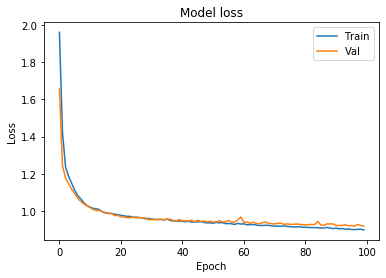

In [94]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

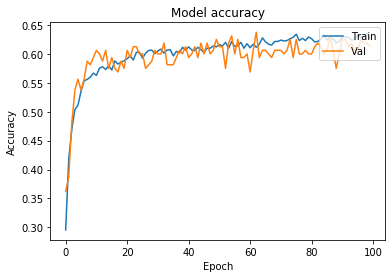

In [95]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [100]:
model_3 = Sequential([
    Dense(1000, activation='softmax', kernel_regularizer=regularizers.l2(0.01), input_shape=(11,)),
    Dropout(0.3),
    Dense(1000, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(9, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
])

In [101]:
model_3.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1279 samples, validate on 160 samples
Epoch 1/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2277 - acc: 0.4175 - val_loss: 1.1979 - val_acc: 0.4000
Epoch 2/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2272 - acc: 0.4175 - val_loss: 1.1972 - val_acc: 0.4000
Epoch 3/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2268 - acc: 0.4175 - val_loss: 1.1967 - val_acc: 0.4000
Epoch 4/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2263 - acc: 0.4175 - val_loss: 1.1962 - val_acc: 0.4000
Epoch 5/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2258 - acc: 0.4175 - val_loss: 1.1959 - val_acc: 0.4000
Epoch 6/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2254 - acc: 0.4175 - val_loss: 1.1956 - val_acc: 0.4000
Epoch 7/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2247 - acc: 0.4175 - val_loss: 1.1953 - val_acc: 0.4000
Epoch 8/

Epoch 61/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2109 - acc: 0.4175 - val_loss: 1.1835 - val_acc: 0.4000
Epoch 62/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2106 - acc: 0.4175 - val_loss: 1.1835 - val_acc: 0.4000
Epoch 63/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2106 - acc: 0.4175 - val_loss: 1.1833 - val_acc: 0.4000
Epoch 64/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2104 - acc: 0.4175 - val_loss: 1.1834 - val_acc: 0.4000
Epoch 65/100
1279/1279 [==============================] - 4s 3ms/step - loss: 1.2104 - acc: 0.4175 - val_loss: 1.1834 - val_acc: 0.4000
Epoch 66/100
1279/1279 [==============================] - 3s 3ms/step - loss: 1.2102 - acc: 0.4175 - val_loss: 1.1832 - val_acc: 0.4000
Epoch 67/100
1279/1279 [==============================] - 3s 3ms/step - loss: 1.2100 - acc: 0.4175 - val_loss: 1.1830 - val_acc: 0.4000
Epoch 68/100
1279/1279 [========================

In [105]:
model_3.evaluate(X_test, Y_test)[1]

160/160 [==============================] - 0s 1ms/step


0.51875

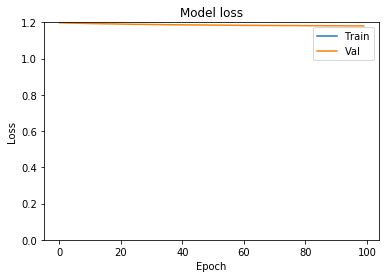

In [107]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

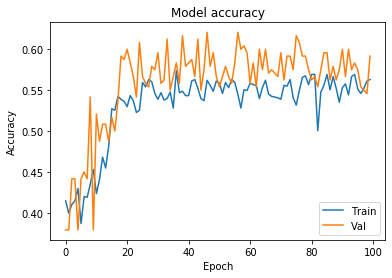

In [64]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [108]:
y_pred=model_3.predict(X_test)
print(y_pred)

[[0.00146113 0.00146119 0.00146114 ... 0.39838746 0.12597433 0.01290564]
 [0.00146113 0.00146119 0.00146114 ... 0.39838746 0.12597433 0.01290564]
 [0.00146113 0.00146119 0.00146114 ... 0.39838746 0.12597433 0.01290564]
 ...
 [0.00146113 0.00146119 0.00146114 ... 0.39838746 0.12597433 0.01290564]
 [0.00146113 0.00146119 0.00146114 ... 0.39838746 0.12597433 0.01290564]
 [0.00146113 0.00146119 0.00146114 ... 0.39838746 0.12597433 0.01290564]]


In [109]:
length=len(y_pred)

In [110]:
for i in range(length):
        y_pred[i]=np.argmax(y_pred[i])
        print(y_pred[i])

[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5

In [111]:
y_pred = y_pred.max(axis=1)

In [112]:
y_pred

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5.], dtype=float32)

In [113]:
df1 = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred})
df1.head(60)

,Actual,Predicted
0,6.0,5.0
1,5.0,5.0
2,6.0,5.0
3,5.0,5.0
4,5.0,5.0
5,5.0,5.0
6,5.0,5.0
7,5.0,5.0
8,5.0,5.0
9,5.0,5.0
